## **Preposessing Dataset Training**

---

Dataset tweet berasal dari penelitian: [Emotion dataset from Indonesian public opinion](https://www.sciencedirect.com/science/article/pii/S2352340922006588?via%3Dihub)

Dataset                              : [link Dataset](https://github.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion)

## Installing Package

In [26]:
! pip install sastrawi

## Import Library

In [27]:
import pandas as pd
import numpy
import collections
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from nltk import tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, HTML

# Load Data Train

In [28]:
anger_data = pd.read_csv("./Dataset/Training/Training_Raw/AngerData.csv", on_bad_lines="skip", delimiter="\t")
anger_data

,tweet,label
0,pagi2 udah di buat emosi :),Anger
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertent...",Anger
2,dah lah emosi mulu liat emyu,Anger
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah....",Anger
4,dih lu yg nyebelin bego,Anger
...,...,...
1125,"dan yg emng belom tau banyak lah tentang dunia ini gitu. tapi gw ngerasa sedih dan marah aja, gatau deh rasanya campur aduk. ini aja ngetik sambil...",Anger
1126,"aa kesel bgt anying. dia sudah di bandaraa, gift gue blm siap. ya allah sedih bgt gue uda gbsa nepatin janji buat meet up dari desember trs harini...",Anger
1127,"ini segala keresahan gua udah mau ilang nihh, pokoknya pikiran udah mulai enak deh tapi entah kenapa fyp gua isinya cuplikan film layangan kusut, ...",Anger
1128,"gue pernah datang lebih awal, sebelum waktu nya malah terus malah dibilang kek gini (kurang lebih) saking jombolnya jadi punya banyak waktu luang ...",Anger


In [29]:
fear_data = pd.read_csv("./Dataset/Training/Training_Raw/FearData.csv", on_bad_lines="skip", delimiter="\t")
fear_data

,tweet,label
0,trs barusan dia reach out aku trs minta tolong buat bantu project dia yaallaah aaaa jujur agak takut pressure tp ok gapapa,Fear
1,sumpah ini receh bgt dan not bts related. cm jujur w magang padet bgt dikasih project mayan banyak. trs kemaren ada senior gd presentasi gt dan ke...,Fear
2,ragu utk bisa beli barang tu karn harganya bisa buat cicilan bulanan,Fear
3,bisa gak sih langsung tanggal 11 aja gausah ada tanggal 10 gua takut banget mana 2 hari lagi,Fear
4,iya kaan yg lain suka pada coba pd gpp tp tetep takut wkwk,Fear
...,...,...
906,bgt! sepi dan serem,Fear
907,"sepi aneh kayak ada yg perhatiin tapi gk ada sapa""",Fear
908,joonyoung.. paling merinding sama sedih jadi 1,Fear
909,"mau nonton kukira kau rumah awokaowkwk, tapi takut terlalu sedih jadi kalut",Fear


In [30]:
joy_data = pd.read_csv("./Dataset/Training/Training_Raw/JoyData.csv", on_bad_lines="skip", delimiter="\t")
joy_data

,tweet,label
0,dipeluk enak nih,Joy
1,masih dongg wkkwkwtar klo gk semangat gk bisa bucinin bebep2 aku,Joy
2,semangat dan bertambah kuatlah kalian frp_natsud_ frp_lucyheart frp_wendy ~,Joy
3,jangan lupa sarapann semangat buat hari inii ayang semoga harimu menyenangkan !!,Joy
4,aw ikut seneng semangat ya kuliahnya!,Joy
...,...,...
1270,yaaaa rumah sepi. mari kita party wakwakk,Joy
1271,"seru tau prenjon zer kdng sedih kdng baper, seru kan",Joy
1272,aahh iyaa bgtt hazaa!! kek tbtb bawaannya mellow bgtt yaa semangaatt hazaa!! semoga mellow2 kzl sedih gajelasnya cpt2 ilang ya,Joy
1273,"kadrun kroco sih cuman dapet nasbung jk ada order demo. tp kini lg sepi order jd kelaparan mknya ngaco meracau jadinya, wkwk ngakak",Joy


In [31]:
love_data = pd.read_csv("./Dataset/Training/Training_Raw/LoveData.csv", on_bad_lines="skip", delimiter="\t")
love_data

,tweet,label
0,"suka banget kata2, ""kebenaran hanya menurut selera kalian saja.""",Love
1,"hanse mode anak rumahan gini tuh aku suka banget wkwk pake kaos terus bawahnya celana model apapun itu, misal jeans atau training tuh fav banget s...",Love
2,"ya kali ngejar ngejar cinta, ngejar tahajjud aja kadang suka telat",Love
3,"selamat pagi sender! sana avail nih pas hari valentine, nanti disayang-sayang sama sana, dia orangnya manja dan suka manjain balik terus juga suka...",Love
4,sopaa!! cuz akuu suka banget jurusan tari di sana aku sering ngikutin daily school nya anak sopaa dan itu asik asik bangett mereka juga suka ada e...,Love
...,...,...
755,ngeliat teaser wonpil jadi sedih anjir apaan sih sebel tapi sayang,Love
756,"lae ku sayang jangan sedih ya, bentar lagu kau menyusul junjungan mu yang kau bela mati matian kemarin sayang kamu",Love
757,"lockey tetep harus support secret number juga, dan bia nerima member baru juga. iya kita sedih, tp kepikiran ga si sama eonni"" secret number kita ...",Love
758,"ku tetap membelamu meski kau jahat, karna ku cinta padamu",Love


In [32]:
neutral_data = pd.read_csv("./Dataset/Training/Training_Raw/NeutralData.csv", on_bad_lines="skip", delimiter="\t")
neutral_data

,tweet,label
0,pengabdian yang terpuji meskipun terlihat biasa,Neutral
1,baru saja mengirim foto,Neutral
2,apa kabar dunia twitter ? masihkah selucu dan seabsurd dulu ?,Neutral
3,yah gimana sih yang yaudah susul aku dulu kita sarapan bubur di tempat biasa,Neutral
4,saja ka dorg suro beli medium 2 set,Neutral
...,...,...
1996,"karena tau rasa kesepian, manusia akan menjadi lebih baik. karena tau rasa sedih, manusia akan menjadi kuat. (princess tutu)",Neutral
1997,"yang terbaik adalah percaya dan berlindung hanya pada tuhan, bukan pada manusia. karena akan ada kecewa jika terlalu percaya pada manusia.",Neutral
1998,sahabat adalah mereka yg tahu bahwa ada sedih di matamu ketika seluruh dunia percaya dengan senyum di wajahmu.,Neutral
1999,"terkadang, bukan karena dusta, kamu membenci seseorang, tapi karena sedih menerima kenyataan bahwa dia tak bisa lagi kamu percaya",Neutral


In [33]:
sad_data = pd.read_csv("./Dataset/Training/Training_Raw/SadData.csv", on_bad_lines="skip", delimiter="\t")
sad_data

,tweet,label
0,"akibat dari telat bangun, anak ikut bangun dan dapur dan rumah tidak kepegang sampe jam segini. sedih karena berantakan, tp gppa dehh penting anak...",Sad
1,sepi,Sad
2,sedih dah,Sad
3,"sedih emg kalo ditinggal temen ngebucin, sedih ga ada waktu main sm temen, sedih krna pengen ngebucin jg",Sad
4,sedih bener niih club ya,Sad
...,...,...
998,pagi saat seisi semesta sujud pada zat yg acap lupa kau sebut sebab kesombongan yg membalut pagi ketika angin berbisik lirih saat malaikat rahmat ...,Sad
999,"meski engkau yg pergi, meski engkau yg meninggalkan. meski engkau hilang,, tp engkau ttp bagiku msh ada si sampingku sprt biasanya,, maaf saat ini...",Sad
1000,udah biasa kalah dan tersakiti,Sad
1001,"apakabar ku?. apakah baik-baik saja,, tidak, aku sedang tidak baik fikiranku sedang tak menentu",Sad


In [34]:
train_dataraw2 = pd.read_csv("./Dataset/Training/Training_Raw3/data_train.csv", on_bad_lines="skip", delimiter=",")
train_dataraw2

,label,tweet
0,trust,Keren kando
1,anticipation,"Grace Natalie kemudian membandingkan hasil temuan tim riset PSI, antara era kepemimpinan Susilo Bambang Yudhoyono (…"
2,trust,"Mantap ,,,,"
3,sadness,Uda pernah. Ga dapet apa apaaaah
4,fear,"[USERNAME] Paling parah sih gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu lah. Bisa nangis sampe pusing karena tern..."
...,...,...
11409,joy,Mahasiswa HI Nilai Ridho Berhasil Majukan Lampung #KlikRMOL #ridho
11410,trust,Retweeted fakhru (@fakherh123):\n\nPemuda lintas agama #Kupang Nusa Tenggara Timur (NTT) dukung TGB Sebagai Presiden…
11411,joy,"@Anarqhy1 @PBB2019 Mari bersama bebenah om,\n\n#PBB2019SemangkinBesar"
11412,trust,"@MRomahurmuziy Selalu ada jalan keluar terbaik dalam setiap masalah, dg berikhtiar dan terus berdoa kita akan menem…"


Gabungkan semua data menjadi satu dataframe.

In [35]:
train_data = pd.concat([train_dataraw2])
train_data.reset_index(inplace=True,drop=True)
train_data

,label,tweet
0,trust,Keren kando
1,anticipation,"Grace Natalie kemudian membandingkan hasil temuan tim riset PSI, antara era kepemimpinan Susilo Bambang Yudhoyono (…"
2,trust,"Mantap ,,,,"
3,sadness,Uda pernah. Ga dapet apa apaaaah
4,fear,"[USERNAME] Paling parah sih gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu lah. Bisa nangis sampe pusing karena tern..."
...,...,...
11409,joy,Mahasiswa HI Nilai Ridho Berhasil Majukan Lampung #KlikRMOL #ridho
11410,trust,Retweeted fakhru (@fakherh123):\n\nPemuda lintas agama #Kupang Nusa Tenggara Timur (NTT) dukung TGB Sebagai Presiden…
11411,joy,"@Anarqhy1 @PBB2019 Mari bersama bebenah om,\n\n#PBB2019SemangkinBesar"
11412,trust,"@MRomahurmuziy Selalu ada jalan keluar terbaik dalam setiap masalah, dg berikhtiar dan terus berdoa kita akan menem…"


In [36]:
train_data.to_csv('./Dataset/Training/not_preposessing3.csv')

# EDA

Sebelum melakukan preprossing pada data, akan dilakukan eda secara singkat untuk melihat tipe data dan null values pada data.

In [37]:
eda_data = train_data.copy()

## Null Values

In [38]:
print("Null Values:")
eda_data.isna().sum()

Null Values:


label    0
tweet    0
dtype: int64

## Data Types

In [39]:
print("Data Types:")
eda_data.info()

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11414 entries, 0 to 11413
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   11414 non-null  object
 1   tweet   11414 non-null  object
dtypes: object(2)
memory usage: 178.5+ KB


In [40]:
eda_data.head()


,label,tweet
0,trust,Keren kando
1,anticipation,"Grace Natalie kemudian membandingkan hasil temuan tim riset PSI, antara era kepemimpinan Susilo Bambang Yudhoyono (…"
2,trust,"Mantap ,,,,"
3,sadness,Uda pernah. Ga dapet apa apaaaah
4,fear,"[USERNAME] Paling parah sih gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu lah. Bisa nangis sampe pusing karena tern..."


## Label Proportion

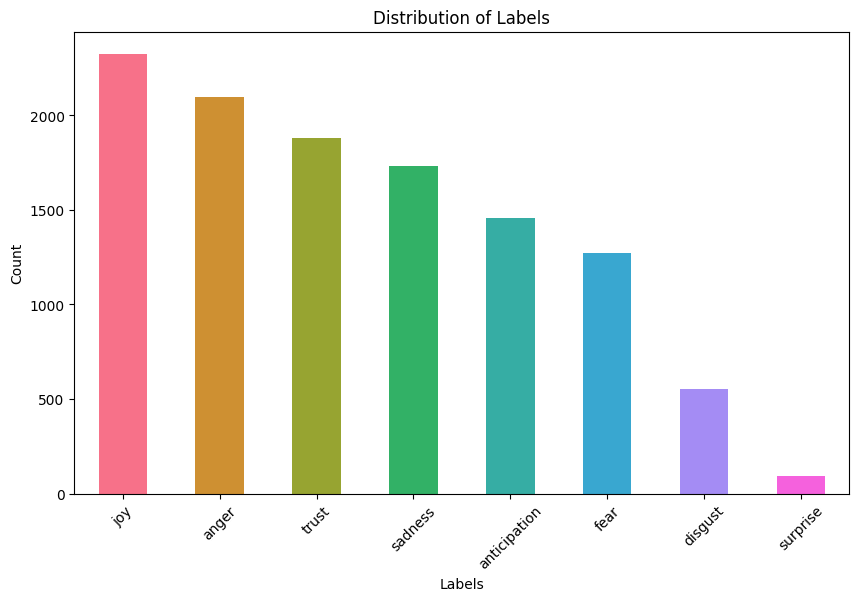

In [41]:
label_counts = eda_data["label"].value_counts()

# Generate a color palette with a unique color for each label
palette = sns.color_palette("husl", len(label_counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=palette)
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Netral memiliki lebih banyak data dibandingkan label yang lain. 

## Data Distribution

In [42]:
eda_data['Length'] = eda_data['tweet'].str.len()
eda_data.head(10)

,label,tweet,Length
0,trust,Keren kando,11
1,anticipation,"Grace Natalie kemudian membandingkan hasil temuan tim riset PSI, antara era kepemimpinan Susilo Bambang Yudhoyono (…",116
2,trust,"Mantap ,,,,",11
3,sadness,Uda pernah. Ga dapet apa apaaaah,32
4,fear,"[USERNAME] Paling parah sih gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu lah. Bisa nangis sampe pusing karena tern...",207
5,sadness,Menerima Pembayaran Menggunakan Ginjal\n\n#ROG\n#ILOVEROG\n#ASUS\n#snsv\n\n:v,77
6,sadness,min facebook saya di ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya,99
7,trust,@Aryprasetyo85 @Gerindra Mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?,107
8,sadness,Sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. Tapi emang harus belajar ikhlas. Ridho. Benar-benar menyerahkan s...,176
9,joy,Pertarungan Real Madrid vs Atletico Madrid menggambarkan Pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat Dunia. Real Madrid mewaki...,755


In [43]:
print(f"Rata-rata panjang karakter tweet : {eda_data['Length'].mean():.2f}")

Rata-rata panjang karakter tweet : 145.58


In [44]:
print(f"Jumlah panjang karakter tweet  : {eda_data['Length'].sum():.2f}")

Jumlah panjang karakter tweet  : 1661606.00


In [45]:
def word_count(tweet):
    tweet_list = tweet.split()
    return len(tweet_list)

In [46]:
eda_data['Word_count'] = eda_data['tweet'].apply(word_count)
eda_data.head(10)

,label,tweet,Length,Word_count
0,trust,Keren kando,11,2
1,anticipation,"Grace Natalie kemudian membandingkan hasil temuan tim riset PSI, antara era kepemimpinan Susilo Bambang Yudhoyono (…",116,16
2,trust,"Mantap ,,,,",11,2
3,sadness,Uda pernah. Ga dapet apa apaaaah,32,6
4,fear,"[USERNAME] Paling parah sih gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu lah. Bisa nangis sampe pusing karena tern...",207,32
5,sadness,Menerima Pembayaran Menggunakan Ginjal\n\n#ROG\n#ILOVEROG\n#ASUS\n#snsv\n\n:v,77,4
6,sadness,min facebook saya di ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya,99,18
7,trust,@Aryprasetyo85 @Gerindra Mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?,107,14
8,sadness,Sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. Tapi emang harus belajar ikhlas. Ridho. Benar-benar menyerahkan s...,176,25
9,joy,Pertarungan Real Madrid vs Atletico Madrid menggambarkan Pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat Dunia. Real Madrid mewaki...,755,96


In [47]:
print(f"Jumlah kata : {eda_data['Word_count'].sum():.2f}")

Jumlah kata : 241057.00


In [48]:
print(f"Rata-rata jumlah kata : {eda_data['Word_count'].mean():.2f}")

Rata-rata jumlah kata : 21.12


In [49]:
eda_data['mean_word_length'] = eda_data['tweet'].map(lambda rev: numpy.mean([len(word) for word in rev.split()]))
eda_data.head(10)

,label,tweet,Length,Word_count,mean_word_length
0,trust,Keren kando,11,2,5.000000
1,anticipation,"Grace Natalie kemudian membandingkan hasil temuan tim riset PSI, antara era kepemimpinan Susilo Bambang Yudhoyono (…",116,16,6.312500
2,trust,"Mantap ,,,,",11,2,5.000000
3,sadness,Uda pernah. Ga dapet apa apaaaah,32,6,4.500000
4,fear,"[USERNAME] Paling parah sih gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu lah. Bisa nangis sampe pusing karena tern...",207,32,5.500000
5,sadness,Menerima Pembayaran Menggunakan Ginjal\n\n#ROG\n#ILOVEROG\n#ASUS\n#snsv\n\n:v,77,4,18.500000
6,sadness,min facebook saya di ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya,99,18,4.555556
7,trust,@Aryprasetyo85 @Gerindra Mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?,107,14,6.571429
8,sadness,Sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. Tapi emang harus belajar ikhlas. Ridho. Benar-benar menyerahkan s...,176,25,6.080000
9,joy,Pertarungan Real Madrid vs Atletico Madrid menggambarkan Pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat Dunia. Real Madrid mewaki...,755,96,6.854167


In [50]:
eda_data['mean_sent_length'] = eda_data['tweet'].map(lambda rev: numpy.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
eda_data.head(10)

,label,tweet,Length,Word_count,mean_word_length,mean_sent_length
0,trust,Keren kando,11,2,5.000000,11.000000
1,anticipation,"Grace Natalie kemudian membandingkan hasil temuan tim riset PSI, antara era kepemimpinan Susilo Bambang Yudhoyono (…",116,16,6.312500,116.000000
2,trust,"Mantap ,,,,",11,2,5.000000,11.000000
3,sadness,Uda pernah. Ga dapet apa apaaaah,32,6,4.500000,15.500000
4,fear,"[USERNAME] Paling parah sih gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu lah. Bisa nangis sampe pusing karena tern...",207,32,5.500000,68.666667
5,sadness,Menerima Pembayaran Menggunakan Ginjal\n\n#ROG\n#ILOVEROG\n#ASUS\n#snsv\n\n:v,77,4,18.500000,77.000000
6,sadness,min facebook saya di ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya,99,18,4.555556,99.000000
7,trust,@Aryprasetyo85 @Gerindra Mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?,107,14,6.571429,107.000000
8,sadness,Sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. Tapi emang harus belajar ikhlas. Ridho. Benar-benar menyerahkan s...,176,25,6.080000,34.400000
9,joy,Pertarungan Real Madrid vs Atletico Madrid menggambarkan Pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat Dunia. Real Madrid mewaki...,755,96,6.854167,150.200000


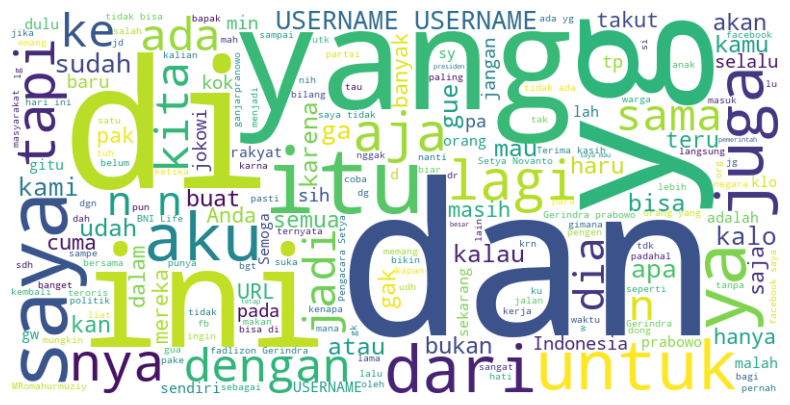

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks dalam satu string
all_tweets = ' '.join(eda_data['tweet'])

# Membuat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Preprocessing

In [52]:
import copy

train_data_copy = copy.deepcopy(train_data)


## Case Folding

### Lowercase

In [53]:
def tweet_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

In [54]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_lowercase)

CPU times: total: 0 ns
Wall time: 10 ms


In [55]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,Keren kando,keren kando
1,"Grace Natalie kemudian membandingkan hasil temuan tim riset PSI, antara era kepemimpinan Susilo Bambang Yudhoyono (…","grace natalie kemudian membandingkan hasil temuan tim riset psi, antara era kepemimpinan susilo bambang yudhoyono (…"
2,"Mantap ,,,,","mantap ,,,,"
3,Uda pernah. Ga dapet apa apaaaah,uda pernah. ga dapet apa apaaaah
4,"[USERNAME] Paling parah sih gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu lah. Bisa nangis sampe pusing karena terngiang2 terus di kepala dan geli aja takut pokoknya gamau liat","[username] paling parah sih gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu lah. bisa nangis sampe pusing karena terngiang2 terus di kepala dan geli aja takut pokoknya gamau liat"
5,Menerima Pembayaran Menggunakan Ginjal\n\n#ROG\n#ILOVEROG\n#ASUS\n#snsv\n\n:v,menerima pembayaran menggunakan ginjal\n\n#rog\n#iloverog\n#asus\n#snsv\n\n:v
6,min facebook saya di ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya,min facebook saya di ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya
7,@Aryprasetyo85 @Gerindra Mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?,@aryprasetyo85 @gerindra mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?
8,Sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. Tapi emang harus belajar ikhlas. Ridho. Benar-benar menyerahkan semuanya ke Tuhan. Kudu legowo.,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. tapi emang harus belajar ikhlas. ridho. benar-benar menyerahkan semuanya ke tuhan. kudu legowo.
9,"Pertarungan Real Madrid vs Atletico Madrid menggambarkan Pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat Dunia. Real Madrid mewakili kekuatan dominasi Borjuasi, mulai dari Borjuasi kecil, Borjuasi Nasional hingga Borjuasi Komparador. Sementara Atletico Madrid mewakili kekuatan solidaritas Kelas pekerja, yg tdk menonjolkan kekuatan individu tertentu. Mereka bersatu dan melawan serta bangkit dari keterpurukan, dgn memanfaatkan 90 menit waktu normal ditambah babak perpanjangan waktu, walau kemudian lagi2 kemenangan harus ditentukan oleh kekuatan individu (Adu Pinalti). Bravo Atletico, Revolusi Belum Selesai... dan jgn salah, ada banyak kemenangan kecil.. dgn Bursa segitu, Hancur Bandar Brooo.... wkwkwkwkwkw :D #DontSTOPthePARTY :D","pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia. real madrid mewakili kekuatan dominasi borjuasi, mulai dari borjuasi kecil, borjuasi nasional hingga borjuasi komparador. sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja, yg tdk menonjolkan kekuatan individu tertentu. mereka bersatu dan melawan serta bangkit dari keterpurukan, dgn memanfaatkan 90 menit waktu normal ditambah babak perpanjangan waktu, walau kemudian lagi2 kemenangan harus ditentukan oleh kekuatan individu (adu pinalti). bravo atletico, revolusi belum selesai... dan jgn salah, ada banyak kemenangan kecil.. dgn bursa segitu, hancur bandar brooo.... wkwkwkwkwkw :d #dontstoptheparty :d"


In [56]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_lowercase)

CPU times: total: 0 ns
Wall time: 10.1 ms


## Cleansing

### Menghapus username

In [57]:
def tweet_delete_username(tweet):
    userPattern       = 'USERNAME'
    # Ngehapus kata "username" 
    tweet = re.sub(userPattern, '', tweet)
    
    return tweet

In [58]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_username)

CPU times: total: 0 ns
Wall time: 19 ms


In [59]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,keren kando,keren kando
1,"grace natalie kemudian membandingkan hasil temuan tim riset psi, antara era kepemimpinan susilo bambang yudhoyono (…","grace natalie kemudian membandingkan hasil temuan tim riset psi, antara era kepemimpinan susilo bambang yudhoyono (…"
2,"mantap ,,,,","mantap ,,,,"
3,uda pernah. ga dapet apa apaaaah,uda pernah. ga dapet apa apaaaah
4,"[username] paling parah sih gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu lah. bisa nangis sampe pusing karena terngiang2 terus di kepala dan geli aja takut pokoknya gamau liat","[username] paling parah sih gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu lah. bisa nangis sampe pusing karena terngiang2 terus di kepala dan geli aja takut pokoknya gamau liat"
5,menerima pembayaran menggunakan ginjal\n\n#rog\n#iloverog\n#asus\n#snsv\n\n:v,menerima pembayaran menggunakan ginjal\n\n#rog\n#iloverog\n#asus\n#snsv\n\n:v
6,min facebook saya di ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya,min facebook saya di ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya
7,@aryprasetyo85 @gerindra mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?,@aryprasetyo85 @gerindra mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?
8,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. tapi emang harus belajar ikhlas. ridho. benar-benar menyerahkan semuanya ke tuhan. kudu legowo.,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. tapi emang harus belajar ikhlas. ridho. benar-benar menyerahkan semuanya ke tuhan. kudu legowo.
9,"pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia. real madrid mewakili kekuatan dominasi borjuasi, mulai dari borjuasi kecil, borjuasi nasional hingga borjuasi komparador. sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja, yg tdk menonjolkan kekuatan individu tertentu. mereka bersatu dan melawan serta bangkit dari keterpurukan, dgn memanfaatkan 90 menit waktu normal ditambah babak perpanjangan waktu, walau kemudian lagi2 kemenangan harus ditentukan oleh kekuatan individu (adu pinalti). bravo atletico, revolusi belum selesai... dan jgn salah, ada banyak kemenangan kecil.. dgn bursa segitu, hancur bandar brooo.... wkwkwkwkwkw :d #dontstoptheparty :d","pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia. real madrid mewakili kekuatan dominasi borjuasi, mulai dari borjuasi kecil, borjuasi nasional hingga borjuasi komparador. sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja, yg tdk menonjolkan kekuatan individu tertentu. mereka bersatu dan melawan serta bangkit dari keterpurukan, dgn memanfaatkan 90 menit waktu normal ditambah babak perpanjangan waktu, walau kemudian lagi2 kemenangan harus ditentukan oleh kekuatan individu (adu pinalti). bravo atletico, revolusi belum selesai... dan jgn salah, ada banyak kemenangan kecil.. dgn bursa segitu, hancur bandar brooo.... wkwkwkwkwkw :d #dontstoptheparty :d"


In [60]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_username)

CPU times: total: 0 ns
Wall time: 22.7 ms


### Menghapus url

In [61]:
def tweet_delete_url(tweet):
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*|url)" #Pola ngehapus url
    tweet = re.sub(urlPattern, '', tweet)
    return tweet

In [62]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_url)

CPU times: total: 78.1 ms
Wall time: 171 ms


In [63]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,keren kando,keren kando
1,"grace natalie kemudian membandingkan hasil temuan tim riset psi, antara era kepemimpinan susilo bambang yudhoyono (…","grace natalie kemudian membandingkan hasil temuan tim riset psi, antara era kepemimpinan susilo bambang yudhoyono (…"
2,"mantap ,,,,","mantap ,,,,"
3,uda pernah. ga dapet apa apaaaah,uda pernah. ga dapet apa apaaaah
4,"[username] paling parah sih gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu lah. bisa nangis sampe pusing karena terngiang2 terus di kepala dan geli aja takut pokoknya gamau liat","[username] paling parah sih gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu lah. bisa nangis sampe pusing karena terngiang2 terus di kepala dan geli aja takut pokoknya gamau liat"
5,menerima pembayaran menggunakan ginjal\n\n#rog\n#iloverog\n#asus\n#snsv\n\n:v,menerima pembayaran menggunakan ginjal\n\n#rog\n#iloverog\n#asus\n#snsv\n\n:v
6,min facebook saya di ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya,min facebook saya di ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya
7,@aryprasetyo85 @gerindra mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?,@aryprasetyo85 @gerindra mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?
8,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. tapi emang harus belajar ikhlas. ridho. benar-benar menyerahkan semuanya ke tuhan. kudu legowo.,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. tapi emang harus belajar ikhlas. ridho. benar-benar menyerahkan semuanya ke tuhan. kudu legowo.
9,"pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia. real madrid mewakili kekuatan dominasi borjuasi, mulai dari borjuasi kecil, borjuasi nasional hingga borjuasi komparador. sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja, yg tdk menonjolkan kekuatan individu tertentu. mereka bersatu dan melawan serta bangkit dari keterpurukan, dgn memanfaatkan 90 menit waktu normal ditambah babak perpanjangan waktu, walau kemudian lagi2 kemenangan harus ditentukan oleh kekuatan individu (adu pinalti). bravo atletico, revolusi belum selesai... dan jgn salah, ada banyak kemenangan kecil.. dgn bursa segitu, hancur bandar brooo.... wkwkwkwkwkw :d #dontstoptheparty :d","pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia. real madrid mewakili kekuatan dominasi borjuasi, mulai dari borjuasi kecil, borjuasi nasional hingga borjuasi komparador. sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja, yg tdk menonjolkan kekuatan individu tertentu. mereka bersatu dan melawan serta bangkit dari keterpurukan, dgn memanfaatkan 90 menit waktu normal ditambah babak perpanjangan waktu, walau kemudian lagi2 kemenangan harus ditentukan oleh kekuatan individu (adu pinalti). bravo atletico, revolusi belum selesai... dan jgn salah, ada banyak kemenangan kecil.. dgn bursa segitu, hancur bandar brooo.... wkwkwkwkwkw :d #dontstoptheparty :d"


In [64]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_url)

CPU times: total: 46.9 ms
Wall time: 151 ms


### Menghapus kelebihan huruf

In [65]:
def tweet_delete_extra_letters(tweet):
    sequencePattern   = r'([A-Za-z])\1{2,}' #Pola ngehapus karakter yang punya kelebihan huruf
    seqReplacePattern = r'\1' #Pola ngereplace yang kelebihan huruf tiga kali
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
    
    return tweet

In [66]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_extra_letters)

CPU times: total: 46.9 ms
Wall time: 169 ms


In [67]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,keren kando,keren kando
1,"grace natalie kemudian membandingkan hasil temuan tim riset psi, antara era kepemimpinan susilo bambang yudhoyono (…","grace natalie kemudian membandingkan hasil temuan tim riset psi, antara era kepemimpinan susilo bambang yudhoyono (…"
2,"mantap ,,,,","mantap ,,,,"
3,uda pernah. ga dapet apa apaaaah,uda pernah. ga dapet apa apah
4,"[username] paling parah sih gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu lah. bisa nangis sampe pusing karena terngiang2 terus di kepala dan geli aja takut pokoknya gamau liat","[username] paling parah sih gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu lah. bisa nangis sampe pusing karena terngiang2 terus di kepala dan geli aja takut pokoknya gamau liat"
5,menerima pembayaran menggunakan ginjal\n\n#rog\n#iloverog\n#asus\n#snsv\n\n:v,menerima pembayaran menggunakan ginjal\n\n#rog\n#iloverog\n#asus\n#snsv\n\n:v
6,min facebook saya di ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya,min facebook saya di ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya
7,@aryprasetyo85 @gerindra mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?,@aryprasetyo85 @gerindra mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?
8,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. tapi emang harus belajar ikhlas. ridho. benar-benar menyerahkan semuanya ke tuhan. kudu legowo.,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. tapi emang harus belajar ikhlas. ridho. benar-benar menyerahkan semuanya ke tuhan. kudu legowo.
9,"pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia. real madrid mewakili kekuatan dominasi borjuasi, mulai dari borjuasi kecil, borjuasi nasional hingga borjuasi komparador. sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja, yg tdk menonjolkan kekuatan individu tertentu. mereka bersatu dan melawan serta bangkit dari keterpurukan, dgn memanfaatkan 90 menit waktu normal ditambah babak perpanjangan waktu, walau kemudian lagi2 kemenangan harus ditentukan oleh kekuatan individu (adu pinalti). bravo atletico, revolusi belum selesai... dan jgn salah, ada banyak kemenangan kecil.. dgn bursa segitu, hancur bandar brooo.... wkwkwkwkwkw :d #dontstoptheparty :d","pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia. real madrid mewakili kekuatan dominasi borjuasi, mulai dari borjuasi kecil, borjuasi nasional hingga borjuasi komparador. sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja, yg tdk menonjolkan kekuatan individu tertentu. mereka bersatu dan melawan serta bangkit dari keterpurukan, dgn memanfaatkan 90 menit waktu normal ditambah babak perpanjangan waktu, walau kemudian lagi2 kemenangan harus ditentukan oleh kekuatan individu (adu pinalti). bravo atletico, revolusi belum selesai... dan jgn salah, ada banyak kemenangan kecil.. dgn bursa segitu, hancur bandar bro.... wkwkwkwkwkw :d #dontstoptheparty :d"


In [68]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_extra_letters)

CPU times: total: 62.5 ms
Wall time: 152 ms


### Menghapus Noise

In [69]:
def tweet_delete_noise(tweet):
        tweet = re.sub(r'(asslamu alaikum|assalamualaikum|asalamualaikum|assalamu\'alaikum|Assalamu alaikum|Assalamualaikum warahmatullahi wabarakatuh|ass wr\. wb\.|ass)', '', tweet)
        tweet = re.sub(r'\b(dah|doi|dih|kok|pol|brow|emyu|skin|anjir|anjay|njir|bjir|jir|njay|anjoy|ajg|min|admin|gan|sis|sih|ke|di|dari|lah|kudu|oalah|lha|yah|yha|amp|n|nih|loo|hadeuh|waduh|sok|na|cing|hadeuh|loh|lho|bro|cui|cuy|yuk|yok|kuy|kan)\b', '', tweet)
        return tweet

In [70]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_noise)

CPU times: total: 46.9 ms
Wall time: 260 ms


In [71]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,keren kando,keren kando
1,"grace natalie kemudian membandingkan hasil temuan tim riset psi, antara era kepemimpinan susilo bambang yudhoyono (…","grace natalie kemudian membandingkan hasil temuan tim riset psi, antara era kepemimpinan susilo bambang yudhoyono (…"
2,"mantap ,,,,","mantap ,,,,"
3,uda pernah. ga dapet apa apah,uda pernah. ga dapet apa apah
4,"[username] paling parah sih gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu lah. bisa nangis sampe pusing karena terngiang2 terus di kepala dan geli aja takut pokoknya gamau liat","[username] paling parah gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu . bisa nangis sampe pusing karena terngiang2 terus kepala dan geli aja takut pokoknya gamau liat"
5,menerima pembayaran menggunakan ginjal\n\n#rog\n#iloverog\n#asus\n#snsv\n\n:v,menerima pembayaran menggunakan ginjal\\#rog\#iloverog\#asus\#snsv\\:v
6,min facebook saya di ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya,facebook saya ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya
7,@aryprasetyo85 @gerindra mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?,@aryprasetyo85 @gerindra mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?
8,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. tapi emang harus belajar ikhlas. ridho. benar-benar menyerahkan semuanya ke tuhan. kudu legowo.,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. tapi emang harus belajar ikhlas. ridho. benar-benar menyerahkan semuanya tuhan. legowo.
9,"pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia. real madrid mewakili kekuatan dominasi borjuasi, mulai dari borjuasi kecil, borjuasi nasional hingga borjuasi komparador. sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja, yg tdk menonjolkan kekuatan individu tertentu. mereka bersatu dan melawan serta bangkit dari keterpurukan, dgn memanfaatkan 90 menit waktu normal ditambah babak perpanjangan waktu, walau kemudian lagi2 kemenangan harus ditentukan oleh kekuatan individu (adu pinalti). bravo atletico, revolusi belum selesai... dan jgn salah, ada banyak kemenangan kecil.. dgn bursa segitu, hancur bandar bro.... wkwkwkwkwkw :d #dontstoptheparty :d","pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia. real madrid mewakili kekuatan dominasi borjuasi, mulai borjuasi kecil, borjuasi nasional hingga borjuasi komparador. sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja, yg tdk menonjolkan kekuatan individu tertentu. mereka bersatu dan melawan serta bangkit keterpurukan, dgn memanfaatkan 90 menit waktu normal ditambah babak perpanjangan waktu, walau kemudian lagi2 kemenangan harus ditentukan oleh kekuatan individu (adu pinalti). bravo atletico, revolusi belum selesai... dan jgn salah, ada banyak kemenangan kecil.. dgn bursa segitu, hancur bandar .... wkwkwkwkwkw :d #dontstoptheparty :d"


In [72]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_noise)

CPU times: total: 62.5 ms
Wall time: 248 ms


### Menghapus new line dan new text

In [73]:
def tweet_delete_new_line_new_text(tweet):
    tweet = re.sub(r'\\[nt]', ' ', tweet)
    return tweet

In [74]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 19 ms


In [75]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,keren kando,keren kando
1,"grace natalie kemudian membandingkan hasil temuan tim riset psi, antara era kepemimpinan susilo bambang yudhoyono (…","grace natalie kemudian membandingkan hasil temuan tim riset psi, antara era kepemimpinan susilo bambang yudhoyono (…"
2,"mantap ,,,,","mantap ,,,,"
3,uda pernah. ga dapet apa apah,uda pernah. ga dapet apa apah
4,"[username] paling parah gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu . bisa nangis sampe pusing karena terngiang2 terus kepala dan geli aja takut pokoknya gamau liat","[username] paling parah gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu . bisa nangis sampe pusing karena terngiang2 terus kepala dan geli aja takut pokoknya gamau liat"
5,menerima pembayaran menggunakan ginjal\\#rog\#iloverog\#asus\#snsv\\:v,menerima pembayaran menggunakan ginjal\\#rog\#iloverog\#asus\#snsv\\:v
6,facebook saya ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya,facebook saya ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya
7,@aryprasetyo85 @gerindra mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?,@aryprasetyo85 @gerindra mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?
8,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. tapi emang harus belajar ikhlas. ridho. benar-benar menyerahkan semuanya tuhan. legowo.,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. tapi emang harus belajar ikhlas. ridho. benar-benar menyerahkan semuanya tuhan. legowo.
9,"pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia. real madrid mewakili kekuatan dominasi borjuasi, mulai borjuasi kecil, borjuasi nasional hingga borjuasi komparador. sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja, yg tdk menonjolkan kekuatan individu tertentu. mereka bersatu dan melawan serta bangkit keterpurukan, dgn memanfaatkan 90 menit waktu normal ditambah babak perpanjangan waktu, walau kemudian lagi2 kemenangan harus ditentukan oleh kekuatan individu (adu pinalti). bravo atletico, revolusi belum selesai... dan jgn salah, ada banyak kemenangan kecil.. dgn bursa segitu, hancur bandar .... wkwkwkwkwkw :d #dontstoptheparty :d","pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia. real madrid mewakili kekuatan dominasi borjuasi, mulai borjuasi kecil, borjuasi nasional hingga borjuasi komparador. sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja, yg tdk menonjolkan kekuatan individu tertentu. mereka bersatu dan melawan serta bangkit keterpurukan, dgn memanfaatkan 90 menit waktu normal ditambah babak perpanjangan waktu, walau kemudian lagi2 kemenangan harus ditentukan oleh kekuatan individu (adu pinalti). bravo atletico, revolusi belum selesai... dan jgn salah, ada banyak kemenangan kecil.. dgn bursa segitu, hancur bandar .... wkwkwkwkwkw :d #dontstoptheparty :d"


In [76]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_new_line_new_text)

CPU times: total: 15.6 ms
Wall time: 20.3 ms


### Menghapus Hastag

In [77]:
def tweet_remove_hashtags(tweet):
    hashtag= r'#\w+'
    tweet = re.sub(hashtag, '', tweet)
    return tweet

In [78]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_remove_hashtags)

CPU times: total: 31.2 ms
Wall time: 20 ms


In [79]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

pd.options.display.max_colwidth = 150

display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,keren kando,keren kando
1,"grace natalie kemudian membandingkan hasil temuan tim riset psi, antara era kepemimpinan susilo bambang yudhoyono (…","grace natalie kemudian membandingkan hasil temuan tim riset psi, antara era kepemimpinan susilo bambang yudhoyono (…"
2,"mantap ,,,,","mantap ,,,,"
3,uda pernah. ga dapet apa apah,uda pernah. ga dapet apa apah
4,"[username] paling parah gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu . bisa nangis sampe pusing karena terngiang2 terus kepala dan geli aja takut pokoknya gamau liat","[username] paling parah gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu . bisa nangis sampe pusing karena terngiang2 terus kepala dan geli aja takut pokoknya gamau liat"
5,menerima pembayaran menggunakan ginjal\\#rog\#iloverog\#asus\#snsv\\:v,menerima pembayaran menggunakan ginjal\\\\\\\:v
6,facebook saya ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya,facebook saya ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya
7,@aryprasetyo85 @gerindra mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?,@aryprasetyo85 @gerindra mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?
8,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. tapi emang harus belajar ikhlas. ridho. benar-benar menyerahkan semuanya tuhan. legowo.,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. tapi emang harus belajar ikhlas. ridho. benar-benar menyerahkan semuanya tuhan. legowo.
9,"pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia. real madrid mewakili kekuatan dominasi borjuasi, mulai borjuasi kecil, borjuasi nasional hingga borjuasi komparador. sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja, yg tdk menonjolkan kekuatan individu tertentu. mereka bersatu dan melawan serta bangkit keterpurukan, dgn memanfaatkan 90 menit waktu normal ditambah babak perpanjangan waktu, walau kemudian lagi2 kemenangan harus ditentukan oleh kekuatan individu (adu pinalti). bravo atletico, revolusi belum selesai... dan jgn salah, ada banyak kemenangan kecil.. dgn bursa segitu, hancur bandar .... wkwkwkwkwkw :d #dontstoptheparty :d","pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia. real madrid mewakili kekuatan dominasi borjuasi, mulai borjuasi kecil, borjuasi nasional hingga borjuasi komparador. sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja, yg tdk menonjolkan kekuatan individu tertentu. mereka bersatu dan melawan serta bangkit keterpurukan, dgn memanfaatkan 90 menit waktu normal ditambah babak perpanjangan waktu, walau kemudian lagi2 kemenangan harus ditentukan oleh kekuatan individu (adu pinalti). bravo atletico, revolusi belum selesai... dan jgn salah, ada banyak kemenangan kecil.. dgn bursa segitu, hancur bandar .... wkwkwkwkwkw :d :d"


In [80]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_remove_hashtags)

CPU times: total: 31.2 ms
Wall time: 25.8 ms


### Menghapus angka

In [81]:
def tweet_delete_number(tweet):
    number = r'\d+' 
    tweet = re.sub(number, '', tweet)
    return tweet

In [82]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_number)

CPU times: total: 15.6 ms
Wall time: 58.4 ms


In [83]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,keren kando,keren kando
1,"grace natalie kemudian membandingkan hasil temuan tim riset psi, antara era kepemimpinan susilo bambang yudhoyono (…","grace natalie kemudian membandingkan hasil temuan tim riset psi, antara era kepemimpinan susilo bambang yudhoyono (…"
2,"mantap ,,,,","mantap ,,,,"
3,uda pernah. ga dapet apa apah,uda pernah. ga dapet apa apah
4,"[username] paling parah gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu . bisa nangis sampe pusing karena terngiang2 terus kepala dan geli aja takut pokoknya gamau liat","[username] paling parah gabisa sama skali liat yg bolong, totol(?), bintik, polkadot semacam itu . bisa nangis sampe pusing karena terngiang terus kepala dan geli aja takut pokoknya gamau liat"
5,menerima pembayaran menggunakan ginjal\\\\\\\:v,menerima pembayaran menggunakan ginjal\\\\\\\:v
6,facebook saya ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya,facebook saya ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya
7,@aryprasetyo85 @gerindra mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?,@aryprasetyo @gerindra mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?
8,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. tapi emang harus belajar ikhlas. ridho. benar-benar menyerahkan semuanya tuhan. legowo.,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. tapi emang harus belajar ikhlas. ridho. benar-benar menyerahkan semuanya tuhan. legowo.
9,"pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia. real madrid mewakili kekuatan dominasi borjuasi, mulai borjuasi kecil, borjuasi nasional hingga borjuasi komparador. sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja, yg tdk menonjolkan kekuatan individu tertentu. mereka bersatu dan melawan serta bangkit keterpurukan, dgn memanfaatkan 90 menit waktu normal ditambah babak perpanjangan waktu, walau kemudian lagi2 kemenangan harus ditentukan oleh kekuatan individu (adu pinalti). bravo atletico, revolusi belum selesai... dan jgn salah, ada banyak kemenangan kecil.. dgn bursa segitu, hancur bandar .... wkwkwkwkwkw :d :d","pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia. real madrid mewakili kekuatan dominasi borjuasi, mulai borjuasi kecil, borjuasi nasional hingga borjuasi komparador. sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja, yg tdk menonjolkan kekuatan individu tertentu. mereka bersatu dan melawan serta bangkit keterpurukan, dgn memanfaatkan menit waktu normal ditambah babak perpanjangan waktu, walau kemudian lagi kemenangan harus ditentukan oleh kekuatan individu (adu pinalti). bravo atletico, revolusi belum selesai... dan jgn salah, ada banyak kemenangan kecil.. dgn bursa segitu, hancur bandar .... wkwkwkwkwkw :d :d"


In [84]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_number)

CPU times: total: 109 ms
Wall time: 107 ms


### Menghapus tanda baca

In [85]:
def tweet_delete_punctuation(tweet):
    punctuationPattern = r'[^\w\s]' 
    tweet = re.sub(punctuationPattern, ' ', tweet)
    
    return tweet

In [86]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_punctuation)

CPU times: total: 31.2 ms
Wall time: 79 ms


In [87]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,keren kando,keren kando
1,"grace natalie kemudian membandingkan hasil temuan tim riset psi, antara era kepemimpinan susilo bambang yudhoyono (…",grace natalie kemudian membandingkan hasil temuan tim riset psi antara era kepemimpinan susilo bambang yudhoyono
2,"mantap ,,,,",mantap
3,uda pernah. ga dapet apa apah,uda pernah ga dapet apa apah
4,"[username] paling parah gabisa sama skali liat yg bolong, totol(?), bintik, polkadot semacam itu . bisa nangis sampe pusing karena terngiang terus kepala dan geli aja takut pokoknya gamau liat",username paling parah gabisa sama skali liat yg bolong totol bintik polkadot semacam itu bisa nangis sampe pusing karena terngiang terus kepala dan geli aja takut pokoknya gamau liat
5,menerima pembayaran menggunakan ginjal\\\\\\\:v,menerima pembayaran menggunakan ginjal v
6,facebook saya ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya,facebook saya ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya
7,@aryprasetyo @gerindra mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?,aryprasetyo gerindra mantap nich partai komplit pake spesial gmn klo indonesia d kuasai partai ini
8,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. tapi emang harus belajar ikhlas. ridho. benar-benar menyerahkan semuanya tuhan. legowo.,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin tapi emang harus belajar ikhlas ridho benar benar menyerahkan semuanya tuhan legowo
9,"pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia. real madrid mewakili kekuatan dominasi borjuasi, mulai borjuasi kecil, borjuasi nasional hingga borjuasi komparador. sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja, yg tdk menonjolkan kekuatan individu tertentu. mereka bersatu dan melawan serta bangkit keterpurukan, dgn memanfaatkan menit waktu normal ditambah babak perpanjangan waktu, walau kemudian lagi kemenangan harus ditentukan oleh kekuatan individu (adu pinalti). bravo atletico, revolusi belum selesai... dan jgn salah, ada banyak kemenangan kecil.. dgn bursa segitu, hancur bandar .... wkwkwkwkwkw :d :d",pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia real madrid mewakili kekuatan dominasi borjuasi mulai borjuasi kecil borjuasi nasional hingga borjuasi komparador sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja yg tdk menonjolkan kekuatan individu tertentu mereka bersatu dan melawan serta bangkit keterpurukan dgn memanfaatkan menit waktu normal ditambah babak perpanjangan waktu walau kemudian lagi kemenangan harus ditentukan oleh kekuatan individu adu pinalti bravo atletico revolusi belum selesai dan jgn salah ada banyak kemenangan kecil dgn bursa segitu hancur bandar wkwkwkwkwkw d d


In [88]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_punctuation)

CPU times: total: 93.8 ms
Wall time: 84.4 ms


### Menghapus Extra Spasi

In [89]:
def tweet_delete_extra_space(tweet):
    tweet = re.sub(r"\s+", " ", tweet)
    tweet = re.sub(r"^\s+|\s+$", "", tweet)
    
    return tweet

In [90]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_extra_space)

CPU times: total: 62.5 ms
Wall time: 200 ms


In [91]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,keren kando,keren kando
1,grace natalie kemudian membandingkan hasil temuan tim riset psi antara era kepemimpinan susilo bambang yudhoyono,grace natalie kemudian membandingkan hasil temuan tim riset psi antara era kepemimpinan susilo bambang yudhoyono
2,mantap,mantap
3,uda pernah ga dapet apa apah,uda pernah ga dapet apa apah
4,username paling parah gabisa sama skali liat yg bolong totol bintik polkadot semacam itu bisa nangis sampe pusing karena terngiang terus kepala dan geli aja takut pokoknya gamau liat,username paling parah gabisa sama skali liat yg bolong totol bintik polkadot semacam itu bisa nangis sampe pusing karena terngiang terus kepala dan geli aja takut pokoknya gamau liat
5,menerima pembayaran menggunakan ginjal v,menerima pembayaran menggunakan ginjal v
6,facebook saya ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya,facebook saya ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya
7,aryprasetyo gerindra mantap nich partai komplit pake spesial gmn klo indonesia d kuasai partai ini,aryprasetyo gerindra mantap nich partai komplit pake spesial gmn klo indonesia d kuasai partai ini
8,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin tapi emang harus belajar ikhlas ridho benar benar menyerahkan semuanya tuhan legowo,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin tapi emang harus belajar ikhlas ridho benar benar menyerahkan semuanya tuhan legowo
9,pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia real madrid mewakili kekuatan dominasi borjuasi mulai borjuasi kecil borjuasi nasional hingga borjuasi komparador sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja yg tdk menonjolkan kekuatan individu tertentu mereka bersatu dan melawan serta bangkit keterpurukan dgn memanfaatkan menit waktu normal ditambah babak perpanjangan waktu walau kemudian lagi kemenangan harus ditentukan oleh kekuatan individu adu pinalti bravo atletico revolusi belum selesai dan jgn salah ada banyak kemenangan kecil dgn bursa segitu hancur bandar wkwkwkwkwkw d d,pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia real madrid mewakili kekuatan dominasi borjuasi mulai borjuasi kecil borjuasi nasional hingga borjuasi komparador sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja yg tdk menonjolkan kekuatan individu tertentu mereka bersatu dan melawan serta bangkit keterpurukan dgn memanfaatkan menit waktu normal ditambah babak perpanjangan waktu walau kemudian lagi kemenangan harus ditentukan oleh kekuatan individu adu pinalti bravo atletico revolusi belum selesai dan jgn salah ada banyak kemenangan kecil dgn bursa segitu hancur bandar wkwkwkwkwkw d d


In [92]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_extra_space)

CPU times: total: 78.1 ms
Wall time: 198 ms


## Tokenization

In [93]:
from nltk.tokenize import word_tokenize 

In [94]:
def tweet_tokenize(tweet):
    return word_tokenize(tweet)

In [95]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_tokenize)

CPU times: total: 953 ms
Wall time: 1.51 s


In [96]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,keren kando,"[keren, kando]"
1,grace natalie kemudian membandingkan hasil temuan tim riset psi antara era kepemimpinan susilo bambang yudhoyono,"[grace, natalie, kemudian, membandingkan, hasil, temuan, tim, riset, psi, antara, era, kepemimpinan, susilo, bambang, yudhoyono]"
2,mantap,[mantap]
3,uda pernah ga dapet apa apah,"[uda, pernah, ga, dapet, apa, apah]"
4,username paling parah gabisa sama skali liat yg bolong totol bintik polkadot semacam itu bisa nangis sampe pusing karena terngiang terus kepala dan geli aja takut pokoknya gamau liat,"[username, paling, parah, gabisa, sama, skali, liat, yg, bolong, totol, bintik, polkadot, semacam, itu, bisa, nangis, sampe, pusing, karena, terngiang, terus, kepala, dan, geli, aja, takut, pokoknya, gamau, liat]"
5,menerima pembayaran menggunakan ginjal v,"[menerima, pembayaran, menggunakan, ginjal, v]"
6,facebook saya ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya,"[facebook, saya, ambil, orang, dan, saya, tidak, tau, siapa, yang, ambil, alih, nya, mohon, pencerahhan, nya]"
7,aryprasetyo gerindra mantap nich partai komplit pake spesial gmn klo indonesia d kuasai partai ini,"[aryprasetyo, gerindra, mantap, nich, partai, komplit, pake, spesial, gmn, klo, indonesia, d, kuasai, partai, ini]"
8,sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin tapi emang harus belajar ikhlas ridho benar benar menyerahkan semuanya tuhan legowo,"[sejujurnya, masih, sesedih, itu, gak, bisa, nurutin, ambisi, yang, selama, ini, dipengenin, tapi, emang, harus, belajar, ikhlas, ridho, benar, benar, menyerahkan, semuanya, tuhan, legowo]"
9,pertarungan real madrid vs atletico madrid menggambarkan pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat dunia real madrid mewakili kekuatan dominasi borjuasi mulai borjuasi kecil borjuasi nasional hingga borjuasi komparador sementara atletico madrid mewakili kekuatan solidaritas kelas pekerja yg tdk menonjolkan kekuatan individu tertentu mereka bersatu dan melawan serta bangkit keterpurukan dgn memanfaatkan menit waktu normal ditambah babak perpanjangan waktu walau kemudian lagi kemenangan harus ditentukan oleh kekuatan individu adu pinalti bravo atletico revolusi belum selesai dan jgn salah ada banyak kemenangan kecil dgn bursa segitu hancur bandar wkwkwkwkwkw d d,"[pertarungan, real, madrid, vs, atletico, madrid, menggambarkan, pertarungan, dua, kontradiksi, abadi, dlm, sistem, ekonomi, masyarakat, dunia, real, madrid, mewakili, kekuatan, dominasi, borjuasi, mulai, borjuasi, kecil, borjuasi, nasional, hingga, borjuasi, komparador, sementara, atletico, madrid, mewakili, kekuatan, solidaritas, kelas, pekerja, yg, tdk, menonjolkan, kekuatan, individu, tertentu, mereka, bersatu, dan, melawan, serta, bangkit, keterpurukan, dgn, memanfaatkan, menit, waktu, normal, ditambah, babak, perpanjangan, waktu, walau, kemudian, lagi, kemenangan, harus, ditentukan, oleh, kekuatan, individu, adu, pinalti, bravo, atletico, revolusi, belum, selesai, dan, jgn, salah, ada, banyak, kemenangan, kecil, dgn, bursa, segitu, hancur, bandar, wkwkwkwkwkw, d, d]"


In [97]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_tokenize)

CPU times: total: 1.08 s
Wall time: 1.44 s


## Normalization

### Import Kamus

In [98]:
kamus_singkatan = pd.read_csv("./Dataset/kamus_singkatan.csv",names=["kata_gaul","kata_asal"],delimiter=";")
kamus_singkatan

,kata_gaul,kata_asal
0,aamiin,amin
1,adek,adik
2,adlh,adalah
3,aer,air
4,aiskrim,es krim
...,...,...
1304,yoi,iya
1305,yup,ya
1306,yups,ya
1307,yupz,ya


In [99]:
def create_kamus():
      kamus = {}
      for i in range(len(kamus_singkatan)):
          kamus[kamus_singkatan["kata_gaul"][i]]=kamus_singkatan["kata_asal"][i].lower().strip()
      return kamus

In [100]:
kamus = create_kamus()
kamus

{'aamiin': 'amin',
 'adek': 'adik',
 'adlh': 'adalah',
 'aer': 'air',
 'aiskrim': 'es krim',
 'aj': 'saja',
 'aja': 'saja',
 'ajah': 'saja',
 'ajalah': 'saja',
 'aje': 'saja',
 'ajh': 'saja',
 'ajj': 'saja',
 'aku': 'saya',
 'ak': 'saya',
 'akoh': 'saya',
 'akutu': 'saya',
 'aq': 'saya',
 'alesan': 'alasan',
 'ama': 'sama',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'ancur': 'hancur',
 'ane': 'saya',
 'anget': 'hangat',
 'anjeng': 'anjing',
 'ank': 'anak',
 'apah': 'apa',
 'aph': 'apa',
 'apo': 'apa',
 'apose': 'apa',
 'apz': 'apa',
 'artine': 'artinya',
 'asek': 'asik',
 'ati2': 'hati-hati',
 'atit': 'sakit',
 'atu': 'satu',
 'atw': 'atau',
 'ayang': 'sayang',
 'ayuk': 'ayo',
 'babang': 'abang',
 'bae': 'baik',
 'bais': 'habis',
 'bakalan': 'akan',
 'bales': 'balas',
 'bandingin': 'bandingkan',
 'banget': 'sekali',
 'bangett': 'sangat',
 'banyakin': 'perbanyak',
 'barengan': 'bersamaan',
 'baryaw': 'sabar ya',
 'baso': 'bakso',
 'bay': 'selamat tinggal',
 'bbrp': 'beberapa',
 'bc': 'baca'

In [101]:
def tweet_replace_contractions(tweet):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(contraction) for contraction in kamus.keys()) + r')\b')
    tweet = pattern.sub(lambda x: kamus[x.group()], tweet)
    return tweet

In [102]:
%%time
for i in range(0,len(train_data)):
    himpunan_kata=[]
    for tokenize_tweet in train_data["tweet"][i]:
        tokenize_tweet = tweet_replace_contractions(tokenize_tweet)
        himpunan_kata.append(tokenize_tweet)
    train_data["tweet"][i]=himpunan_kata
    i+1

CPU times: total: 2min 25s
Wall time: 2min 37s


In [103]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[keren, kando]","[keren, kando]"
1,"[grace, natalie, kemudian, membandingkan, hasil, temuan, tim, riset, psi, antara, era, kepemimpinan, susilo, bambang, yudhoyono]","[grace, natalie, kemudian, membandingkan, hasil, temuan, tim, riset, psi, antara, era, kepemimpinan, susilo, bambang, yudhoyono]"
2,[mantap],[mantap]
3,"[uda, pernah, ga, dapet, apa, apah]","[sudah, pernah, tidak, dapat, apa, apa]"
4,"[username, paling, parah, gabisa, sama, skali, liat, yg, bolong, totol, bintik, polkadot, semacam, itu, bisa, nangis, sampe, pusing, karena, terngiang, terus, kepala, dan, geli, aja, takut, pokoknya, gamau, liat]","[username, paling, parah, tidak bisa, sama, sekali, liat, yang, bolong, totol, bintik, polkadot, semacam, itu, bisa, nangis, sampai, pusing, karena, terngiang, terus, kepala, dan, geli, saja, takut, pokoknya, tidak mau, liat]"
5,"[menerima, pembayaran, menggunakan, ginjal, v]","[menerima, pembayaran, menggunakan, ginjal, v]"
6,"[facebook, saya, ambil, orang, dan, saya, tidak, tau, siapa, yang, ambil, alih, nya, mohon, pencerahhan, nya]","[facebook, saya, ambil, orang, dan, saya, tidak, tahu, siapa, yang, ambil, alih, nya, mohon, pencerahhan, nya]"
7,"[aryprasetyo, gerindra, mantap, nich, partai, komplit, pake, spesial, gmn, klo, indonesia, d, kuasai, partai, ini]","[aryprasetyo, gerindra, mantap, ini, partai, komplit, pakai, spesial, bagaimana, kalau, indonesia, d, kuasai, partai, ini]"
8,"[sejujurnya, masih, sesedih, itu, gak, bisa, nurutin, ambisi, yang, selama, ini, dipengenin, tapi, emang, harus, belajar, ikhlas, ridho, benar, benar, menyerahkan, semuanya, tuhan, legowo]","[sejujurnya, masih, sesedih, itu, tidak, bisa, nurutin, ambisi, yang, selama, ini, dipengenin, tapi, memang, harus, belajar, ikhlas, ridho, benar, benar, menyerahkan, semuanya, tuhan, legowo]"
9,"[pertarungan, real, madrid, vs, atletico, madrid, menggambarkan, pertarungan, dua, kontradiksi, abadi, dlm, sistem, ekonomi, masyarakat, dunia, real, madrid, mewakili, kekuatan, dominasi, borjuasi, mulai, borjuasi, kecil, borjuasi, nasional, hingga, borjuasi, komparador, sementara, atletico, madrid, mewakili, kekuatan, solidaritas, kelas, pekerja, yg, tdk, menonjolkan, kekuatan, individu, tertentu, mereka, bersatu, dan, melawan, serta, bangkit, keterpurukan, dgn, memanfaatkan, menit, waktu, normal, ditambah, babak, perpanjangan, waktu, walau, kemudian, lagi, kemenangan, harus, ditentukan, oleh, kekuatan, individu, adu, pinalti, bravo, atletico, revolusi, belum, selesai, dan, jgn, salah, ada, banyak, kemenangan, kecil, dgn, bursa, segitu, hancur, bandar, wkwkwkwkwkw, d, d]","[pertarungan, real, madrid, vs, atletico, madrid, menggambarkan, pertarungan, dua, kontradiksi, abadi, dalam, sistem, ekonomi, masyarakat, dunia, real, madrid, mewakili, kekuatan, dominasi, borjuasi, mulai, borjuasi, kecil, borjuasi, nasional, hingga, borjuasi, komparador, sementara, atletico, madrid, mewakili, kekuatan, solidaritas, kelas, pekerja, yang, tidak, menonjolkan, kekuatan, individu, tertentu, mereka, bersatu, dan, melawan, serta, bangkit, keterpurukan, dengan, memanfaatkan, menit, waktu, normal, ditambah, babak, perpanjangan, waktu, walau, kemudian, lagi, kemenangan, harus, ditentukan, oleh, kekuatan, individu, adu, pinalti, bravo, atletico, revolusi, belum, selesai, dan, jangan, salah, ada, banyak, kemenangan, kecil, dengan, bursa, segitu, hancur, bandar, wkwkwkwkwkw, d, d]"


In [104]:
%%time
for i in range(0,len(train_data_copy)):
    himpunan_kata=[]
    for tokenize_tweet in train_data_copy["tweet"][i]:
        tokenize_tweet = tweet_replace_contractions(tokenize_tweet)
        himpunan_kata.append(tokenize_tweet)
    train_data_copy["tweet"][i]=himpunan_kata
    i+1

CPU times: total: 2min 25s
Wall time: 2min 34s


### Stopwords Removal

In [105]:
def tweet_stopwords_removal(tweet):
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    tweet = stopword.remove(tweet)
    return tweet

In [106]:
%%time
for i in range(0,len(train_data)):
    himpunan_kata=[]
    for tokenize_tweet in train_data["tweet"][i]:
        tokenize_tweet = tweet_stopwords_removal(tokenize_tweet)
        if tokenize_tweet == "":
            pass
        else:
            himpunan_kata.append(tokenize_tweet)
    train_data["tweet"][i]=himpunan_kata
    i+1

CPU times: total: 12.3 s
Wall time: 13.2 s


In [107]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[keren, kando]","[keren, kando]"
1,"[grace, natalie, kemudian, membandingkan, hasil, temuan, tim, riset, psi, antara, era, kepemimpinan, susilo, bambang, yudhoyono]","[grace, natalie, membandingkan, hasil, temuan, tim, riset, psi, era, kepemimpinan, susilo, bambang, yudhoyono]"
2,[mantap],[mantap]
3,"[sudah, pernah, tidak, dapat, apa, apa]",[]
4,"[username, paling, parah, tidak bisa, sama, sekali, liat, yang, bolong, totol, bintik, polkadot, semacam, itu, bisa, nangis, sampai, pusing, karena, terngiang, terus, kepala, dan, geli, saja, takut, pokoknya, tidak mau, liat]","[username, parah, liat, bolong, totol, bintik, polkadot, nangis, pusing, terngiang, kepala, geli, takut, pokoknya, liat]"
5,"[menerima, pembayaran, menggunakan, ginjal, v]","[menerima, pembayaran, ginjal]"
6,"[facebook, saya, ambil, orang, dan, saya, tidak, tahu, siapa, yang, ambil, alih, nya, mohon, pencerahhan, nya]","[facebook, ambil, ambil, alih, pencerahhan]"
7,"[aryprasetyo, gerindra, mantap, ini, partai, komplit, pakai, spesial, bagaimana, kalau, indonesia, d, kuasai, partai, ini]","[aryprasetyo, gerindra, mantap, partai, komplit, pakai, spesial, indonesia, kuasai, partai]"
8,"[sejujurnya, masih, sesedih, itu, tidak, bisa, nurutin, ambisi, yang, selama, ini, dipengenin, tapi, memang, harus, belajar, ikhlas, ridho, benar, benar, menyerahkan, semuanya, tuhan, legowo]","[sejujurnya, sesedih, nurutin, ambisi, dipengenin, belajar, ikhlas, ridho, menyerahkan, tuhan, legowo]"
9,"[pertarungan, real, madrid, vs, atletico, madrid, menggambarkan, pertarungan, dua, kontradiksi, abadi, dalam, sistem, ekonomi, masyarakat, dunia, real, madrid, mewakili, kekuatan, dominasi, borjuasi, mulai, borjuasi, kecil, borjuasi, nasional, hingga, borjuasi, komparador, sementara, atletico, madrid, mewakili, kekuatan, solidaritas, kelas, pekerja, yang, tidak, menonjolkan, kekuatan, individu, tertentu, mereka, bersatu, dan, melawan, serta, bangkit, keterpurukan, dengan, memanfaatkan, menit, waktu, normal, ditambah, babak, perpanjangan, waktu, walau, kemudian, lagi, kemenangan, harus, ditentukan, oleh, kekuatan, individu, adu, pinalti, bravo, atletico, revolusi, belum, selesai, dan, jangan, salah, ada, banyak, kemenangan, kecil, dengan, bursa, segitu, hancur, bandar, wkwkwkwkwkw, d, d]","[pertarungan, real, madrid, vs, atletico, madrid, menggambarkan, pertarungan, kontradiksi, abadi, sistem, ekonomi, masyarakat, dunia, real, madrid, mewakili, kekuatan, dominasi, borjuasi, borjuasi, borjuasi, nasional, borjuasi, komparador, atletico, madrid, mewakili, kekuatan, solidaritas, kelas, pekerja, menonjolkan, kekuatan, individu, bersatu, melawan, bangkit, keterpurukan, memanfaatkan, menit, waktu, normal, ditambah, babak, perpanjangan, waktu, kemenangan, ditentukan, kekuatan, individu, adu, pinalti, bravo, atletico, revolusi, selesai, salah, kemenangan, bursa, segitu, hancur, bandar, wkwkwkwkwkw]"


In [108]:
%%time
for i in range(0,len(train_data_copy)):
    himpunan_kata=[]
    for tokenize_tweet in train_data_copy["tweet"][i]:
        tokenize_tweet = tweet_stopwords_removal(tokenize_tweet)
        if tokenize_tweet == "":
            pass
        else:
            himpunan_kata.append(tokenize_tweet)
    train_data_copy["tweet"][i]=himpunan_kata
    i+1

CPU times: total: 12.3 s
Wall time: 13.2 s


## Saving Preposessing

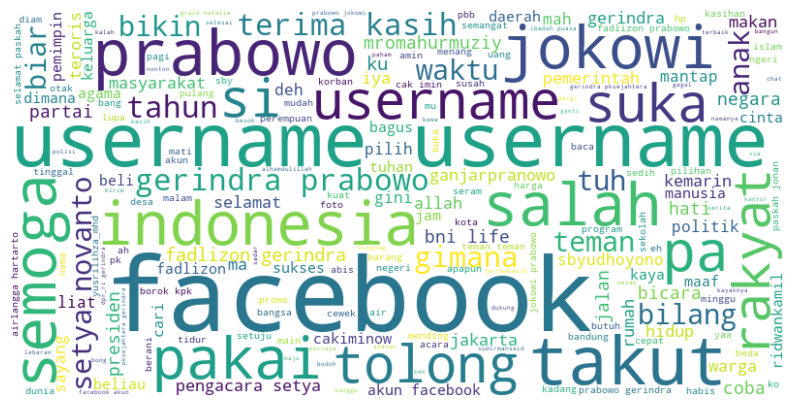

In [109]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called train_data with a column "tweet"
# containing the tweets

# Convert lists of tweets into a single string
all_tweets = ' '.join([tweet for sublist in train_data['tweet'] for tweet in sublist])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [110]:
comparison_df = pd.DataFrame({
    'Before ': eda_data['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,Keren kando,"[keren, kando]"
1,"Grace Natalie kemudian membandingkan hasil temuan tim riset PSI, antara era kepemimpinan Susilo Bambang Yudhoyono (…","[grace, natalie, membandingkan, hasil, temuan, tim, riset, psi, era, kepemimpinan, susilo, bambang, yudhoyono]"
2,"Mantap ,,,,",[mantap]
3,Uda pernah. Ga dapet apa apaaaah,[]
4,"[USERNAME] Paling parah sih gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu lah. Bisa nangis sampe pusing karena terngiang2 terus di kepala dan geli aja takut pokoknya gamau liat","[username, parah, liat, bolong, totol, bintik, polkadot, nangis, pusing, terngiang, kepala, geli, takut, pokoknya, liat]"
5,Menerima Pembayaran Menggunakan Ginjal\n\n#ROG\n#ILOVEROG\n#ASUS\n#snsv\n\n:v,"[menerima, pembayaran, ginjal]"
6,min facebook saya di ambil orang dan saya tidak tau siapa yang ambil alih nya mohon pencerahhan nya,"[facebook, ambil, ambil, alih, pencerahhan]"
7,@Aryprasetyo85 @Gerindra Mantap nich partai...komplit pake spesial gmn klo indonesia d kuasai partai ini?,"[aryprasetyo, gerindra, mantap, partai, komplit, pakai, spesial, indonesia, kuasai, partai]"
8,Sejujurnya masih sesedih itu gak bisa nurutin ambisi yang selama ini dipengenin. Tapi emang harus belajar ikhlas. Ridho. Benar-benar menyerahkan semuanya ke Tuhan. Kudu legowo.,"[sejujurnya, sesedih, nurutin, ambisi, dipengenin, belajar, ikhlas, ridho, menyerahkan, tuhan, legowo]"
9,"Pertarungan Real Madrid vs Atletico Madrid menggambarkan Pertarungan dua kontradiksi abadi dlm sistem ekonomi masyarakat Dunia. Real Madrid mewakili kekuatan dominasi Borjuasi, mulai dari Borjuasi kecil, Borjuasi Nasional hingga Borjuasi Komparador. Sementara Atletico Madrid mewakili kekuatan solidaritas Kelas pekerja, yg tdk menonjolkan kekuatan individu tertentu. Mereka bersatu dan melawan serta bangkit dari keterpurukan, dgn memanfaatkan 90 menit waktu normal ditambah babak perpanjangan waktu, walau kemudian lagi2 kemenangan harus ditentukan oleh kekuatan individu (Adu Pinalti). Bravo Atletico, Revolusi Belum Selesai... dan jgn salah, ada banyak kemenangan kecil.. dgn Bursa segitu, Hancur Bandar Brooo.... wkwkwkwkwkw :D #DontSTOPthePARTY :D","[pertarungan, real, madrid, vs, atletico, madrid, menggambarkan, pertarungan, kontradiksi, abadi, sistem, ekonomi, masyarakat, dunia, real, madrid, mewakili, kekuatan, dominasi, borjuasi, borjuasi, borjuasi, nasional, borjuasi, komparador, atletico, madrid, mewakili, kekuatan, solidaritas, kelas, pekerja, menonjolkan, kekuatan, individu, bersatu, melawan, bangkit, keterpurukan, memanfaatkan, menit, waktu, normal, ditambah, babak, perpanjangan, waktu, kemenangan, ditentukan, kekuatan, individu, adu, pinalti, bravo, atletico, revolusi, selesai, salah, kemenangan, bursa, segitu, hancur, bandar, wkwkwkwkwkw]"


In [111]:
train_data.to_csv("Dataset/Training/Clean_train_data3_nostem.csv")